# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [22]:
# откройте данные: ваш код здесь
import pandas as pd
e_data = pd.read_csv('spam_or_not_spam.csv')
e_data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [23]:
# рассчитайте частоты для классов : ваш код здесь

# Рассчитываем частоты для классов
class_counts = e_data['label'].value_counts()
display(class_counts)

label
0    2500
1     500
Name: count, dtype: int64

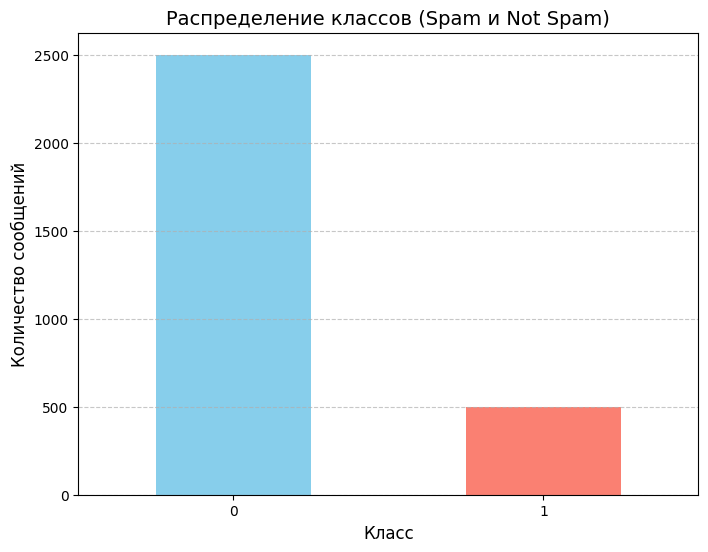

In [24]:
# визуализируйте результат: ваш код здесь

import matplotlib.pyplot as plt

# Создаём столбчатую диаграмму
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Распределение классов (Spam и Not Spam)', fontsize=14)
plt.xlabel('Класс', fontsize=12)
plt.ylabel('Количество сообщений', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [26]:
# Предобработка: заменяем пустые строки и строки, состоящие из пробелов, на NaN
e_data['email'] = e_data['email'].replace(r'^\s*$', pd.NA, regex=True)

# Удаляем строки с пропущенными значениями
e_data = e_data.dropna(subset=['email'])

print(f"Данные после удаления строк с пропусками: {e_data.shape}")


Данные после удаления строк с пропусками: (2997, 2)


Переводим данные в векторный вид:

In [27]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(e_data["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [28]:
# Определяем количество признаков
num_features = X.shape[1]
print(f"Количество признаков в наборе данных: {num_features}")


Количество признаков в наборе данных: 34116


## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [29]:
# Целевая переменная
y = e_data['label']

# Признаки
X = vectorizer.fit_transform(e_data['email'])

print(f"Размер матрицы признаков X: {X.shape}")
print(f"Целевая переменная y: {y.shape}")


Размер матрицы признаков X: (2997, 34116)
Целевая переменная y: (2997,)


Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [30]:
from sklearn.model_selection import train_test_split

# Разделяем выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25, 
    stratify=y, 
    random_state=42
)

# Выводим размеры полученных выборок
print(f"Размер обучающей выборки: {X_train.shape[0]} сообщений")
print(f"Размер тестовой выборки: {X_test.shape[0]} сообщений")


Размер обучающей выборки: 2247 сообщений
Размер тестовой выборки: 750 сообщений


Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [31]:
# Рассчитываем среднее значение целевой переменной по тестовой выборке
mean_target_value = y_test.mean()
print(f"Среднее значение целевой переменной по тестовой выборке: {mean_target_value}")


Среднее значение целевой переменной по тестовой выборке: 0.16533333333333333


## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [32]:
from sklearn.naive_bayes import MultinomialNB

# Определяем и обучаем модель
model = MultinomialNB(alpha=0.01)  # Задаём alpha=0.01
model.fit(X_train, y_train)

# Проверим, обучена ли модель, предсказав метки на тестовом наборе
y_pred = model.predict(X_test)

print("Модель успешно обучена!")


Модель успешно обучена!


Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Расчёт Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Расчёт Precision (доля правильных положительных предсказаний среди всех положительных предсказаний)
precision = precision_score(y_test, y_pred)

# Расчёт Recall (доля правильно найденных спам-сообщений среди всех реальных спам-сообщений)
recall = recall_score(y_test, y_pred)

# Расчёт F1-Score (среднее гармоническое Precision и Recall)
f1 = f1_score(y_test, y_pred)

# Вывод метрик
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")


Accuracy: 0.987
Precision: 1.000
Recall: 0.919
F1-Score: 0.958


Нарисуйте ROC-кривую:

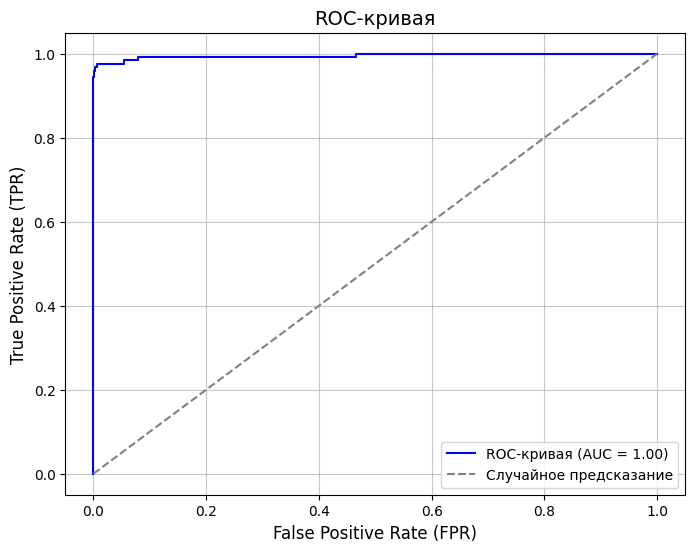

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Рассчитываем вероятности предсказаний для тестовой выборки
y_prob = model.predict_proba(X_test)[:, 1]

# Вычисляем значения ROC-кривой (FPR, TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Рассчитываем значение AUC (Area Under Curve)
auc_score = roc_auc_score(y_test, y_prob)

# Построение ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC-кривая (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Случайное предсказание')
plt.title('ROC-кривая', fontsize=14)
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.legend(loc='lower right')
plt.grid(alpha=0.7)
plt.show()


## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [35]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Список значений alpha для проверки
alphas = [0.001, 0.01, 0.1, 0.5, 1, 5, 10]

# Хранение результатов
alpha_scores = {}

# Кросс-валидация для каждого значения alpha
for alpha in alphas:
    model = MultinomialNB(alpha=alpha)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')  # Используем F1-метрику
    alpha_scores[alpha] = np.mean(scores)
    print(f"Alpha: {alpha}, F1-Score: {np.mean(scores):.3f}")

# Вывод лучших результатов
best_alpha = max(alpha_scores, key=alpha_scores.get)
print(f"\nЛучшее значение alpha: {best_alpha} с F1-Score: {alpha_scores[best_alpha]:.3f}")


Alpha: 0.001, F1-Score: 0.958
Alpha: 0.01, F1-Score: 0.967
Alpha: 0.1, F1-Score: 0.976
Alpha: 0.5, F1-Score: 0.973
Alpha: 1, F1-Score: 0.971
Alpha: 5, F1-Score: 0.727
Alpha: 10, F1-Score: 0.433

Лучшее значение alpha: 0.1 с F1-Score: 0.976


- При низких значениях alpha (например, 0.001, 0.01):

Модель уделяет меньше внимания сглаживанию редких слов, что может помочь при большом объёме данных. Однако качество всё ещё чуть ниже максимума.

- При alpha = 0.1:

Баланс между сглаживанием и точностью обработки редко встречающихся слов достигает оптимума, обеспечивая наилучшие результаты.

- ри высоких значениях alpha (например, 5, 10):

Сглаживание становится слишком сильным, что "размывает" различия между часто и редко встречающимися словами. Это приводит к значительному снижению качества модели (особенно виден спад на alpha = 10).